## Import Libraries

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import Data

In [6]:
data_path = "data/census.csv"

In [8]:
census_df = pd.read_csv(data_path)
census_df.head()

,age,workclass,fnlgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Exploring Data

In [9]:
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlgt           32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


As we can see there is no null values

In [10]:
census_df.describe()

,age,fnlgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## Check for duplicates

In [14]:
census_df.duplicated().sum()

24

In [ ]:
census_df.drop_duplicates(inplace=True)
census_df.duplicated().sum()

## Removing white spaces before columns names

In [22]:
census_df.rename(columns=lambda x: x.strip(), inplace=True)

## Getting Categorical cols

In [23]:
cat_cols = census_df.select_dtypes(include=['object']).columns
cat_cols

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'salary'],
      dtype='object')

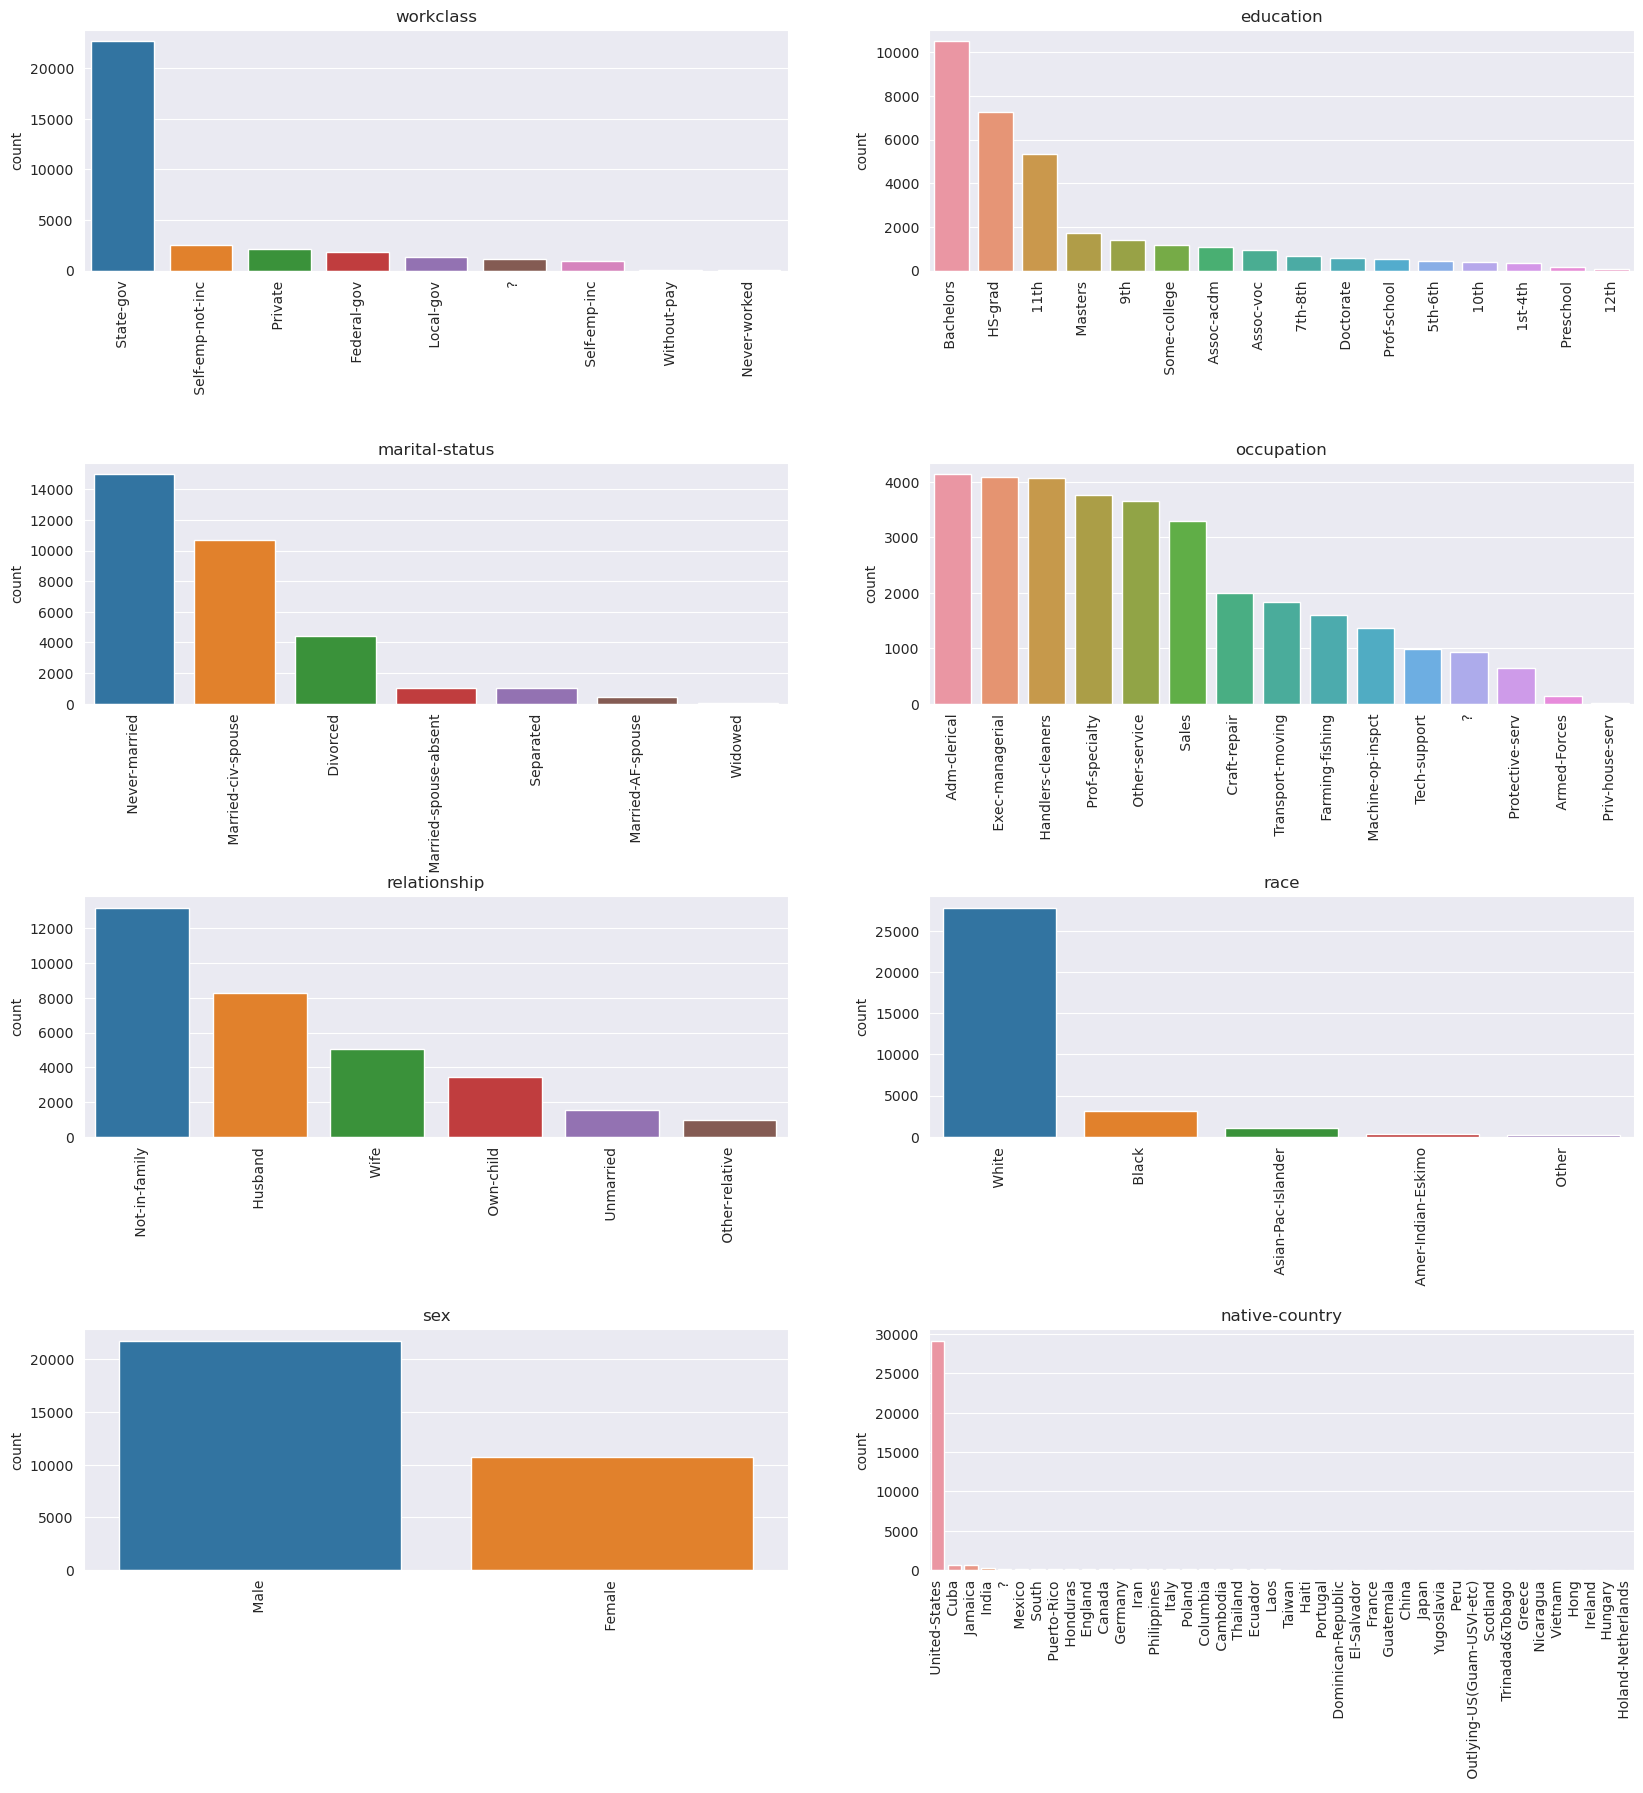

In [88]:
# Create a figure and a grid of subplots (3 rows, 3 columns)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate through the subplots and plot barplots
for i, category in enumerate(cat_cols[:-1]):
    ax = axes[i]  # Select the current subplot
    sns.barplot(x=census_df[category].unique(), y=census_df[category].value_counts(), data=census_df, ax=ax)
    ax.set_title(category)  # Set subplot title
    ax.set_xticklabels(census_df[category].unique(),rotation=90)
    
# Adjust spacing between subplots automatically
plt.subplots_adjust(wspace=0.2, hspace=0.8)

# Display the plot
plt.show()

## Getting Numerical cols

In [24]:
numerical_cols = census_df.select_dtypes(include=['int','float']).columns
numerical_cols

Index(['age', 'fnlgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

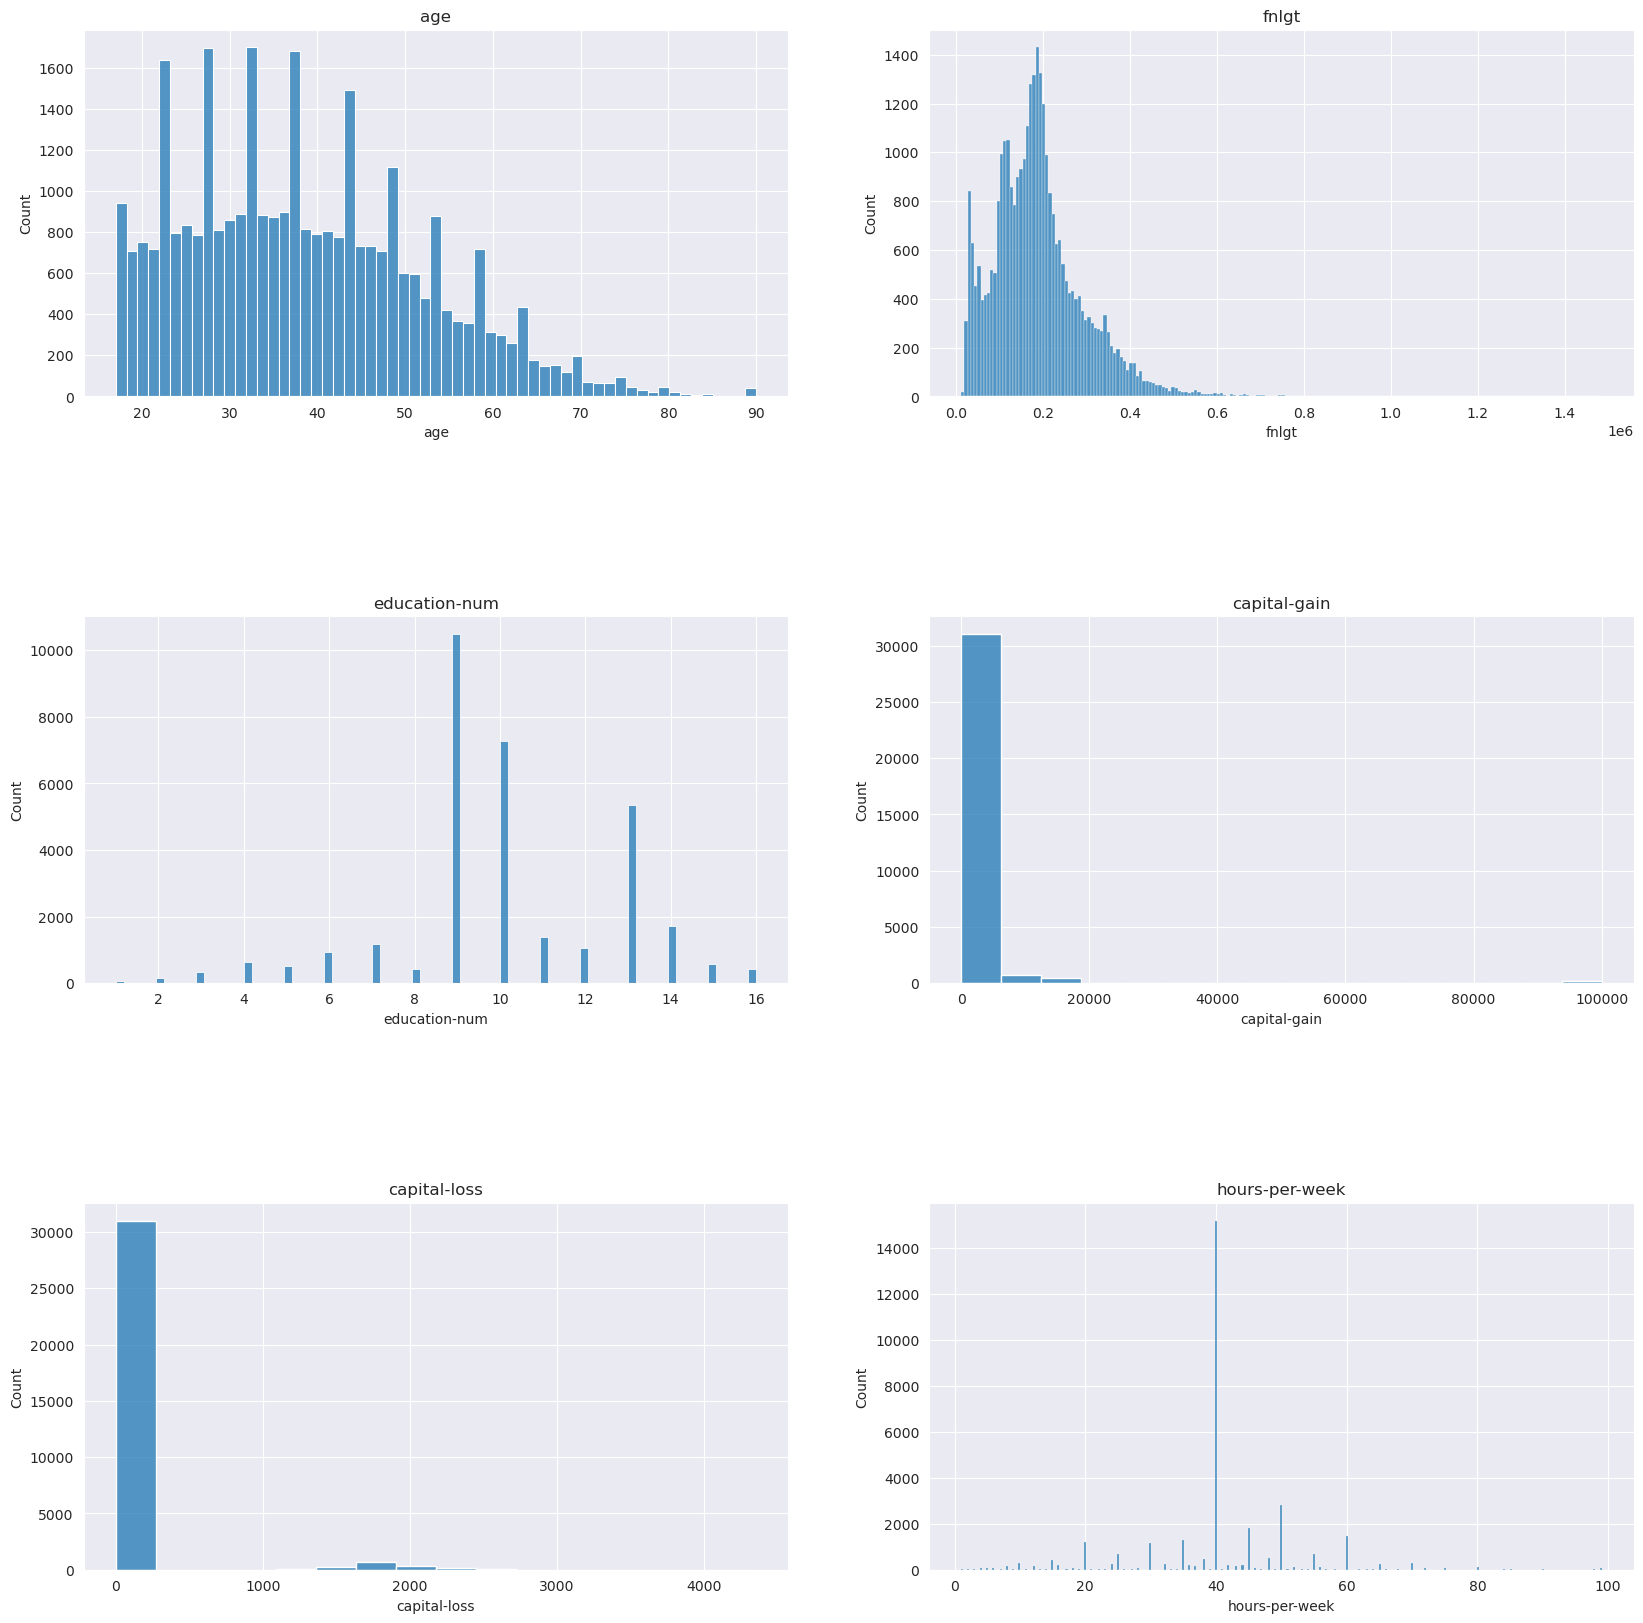

In [70]:
# Create a figure and a grid of subplots (3 rows, 2 columns)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 20))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate through the subplots and plot barplots
for i, col in enumerate(numerical_cols):
    ax = axes[i]  # Select the current subplot
    sns.histplot(x=col, data=census_df, ax=ax)
    ax.set_title(col)  # Set subplot title
    
# Adjust spacing between subplots automatically
plt.subplots_adjust(wspace=0.2, hspace=0.6)

# Display the plot
plt.show()

In [71]:
census_df.shape

(32537, 15)

## remove white spaces from all cells

In [94]:
census_df = census_df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

## Remove "?" from raws 

In [92]:
census_df.replace({"?":None},inplace=True)
census_df.dropna(inplace=True)

In [93]:
census_df.shape

(30139, 15)

**Steps to be used in the basic_cleaning file**
- removing duplicates
- using strip to remove whitespaces in string cells
- removing the rows that contains "?"
- removing the outliers from fnight, capital loss, and capital gain